In [1]:
from pymongo import MongoClient
from sshtunnel import SSHTunnelForwarder
import pprint
from bson.objectid import ObjectId
import pyperclip as clip
import json
import tensorflow as tf
import pandas as pd
import numpy as np
import itertools as it
# from datasu import auc
# import pixiedust
# clip.copy(json.dumps(m1['msg']))
import nbimporter
from common_functions import *
pd.options.mode.chained_assignment = None  # default='warn'


Importing Jupyter notebook from common_functions.ipynb


In [48]:
num_true1=1
num_true2=2
num_false=6
y_score = np.array([0.8]*num_true1+[0.7]*num_true2+[0.6]*num_false)
y_true = np.array([True]*num_true1+[True]*num_true2+[False]*num_false)
print(pd.DataFrame({'y_true': y_true, 'y_score': y_score}).sort_values(by=['y_score'], ascending=False))

   y_true  y_score
0    True      0.8
1    True      0.7
2    True      0.7
3   False      0.6
4   False      0.6
5   False      0.6
6   False      0.6
7   False      0.6
8   False      0.6


no matter how much FALSEs exists in dataset, as long as threshold that can completely disriminate between TRUEs and FALSEs - Avr. Precesion would be 100%


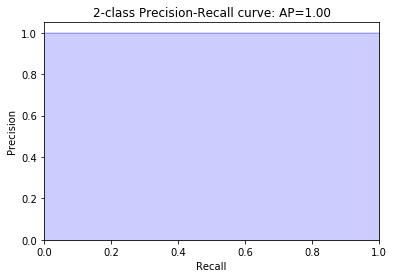

In [45]:
plot_precision_recall_curve(y_score, y_true)
print("no matter how much FALSEs exists in dataset, as long as threshold that can completely disriminate between TRUEs and FALSEs - Avr. Precesion would be 100%")

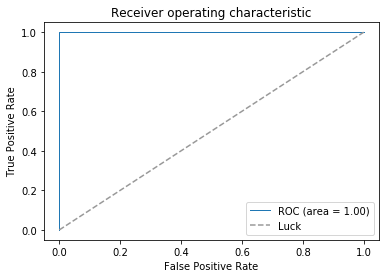

no matter how much FALSEs exists in dataset, as long as threshold that can completely disriminate between TRUEs and FALSEs - ROC AUC would be 100%


In [46]:
plot_auc_curve(y_score, y_true)
print("no matter how much FALSEs exists in dataset, as long as threshold that can completely disriminate between TRUEs and FALSEs - ROC AUC would be 100%")

In [102]:
num_true1=3
num_true2=3
num_false=10
y_score = np.array([0.8]*num_true1+[0.6]*num_true2+[0.7]*num_false)
y_true = np.array([True]*num_true1+[True]*num_true2+[False]*num_false)
data=pd.DataFrame({'y_true': y_true, 'y_score': y_score}).sort_values(by=['y_score'], ascending=False)
data_TP = data[:num_true1+num_true2]
print('+++++++ DQ ++++++') 
print(data)
print('+++++++ TP ++++++') 
print(data_TP)

+++++++ DQ ++++++
    y_true  y_score
0     True      0.8
1     True      0.8
2     True      0.8
6    False      0.7
7    False      0.7
8    False      0.7
9    False      0.7
10   False      0.7
11   False      0.7
12   False      0.7
13   False      0.7
14   False      0.7
15   False      0.7
3     True      0.6
4     True      0.6
5     True      0.6
+++++++ TP ++++++
   y_true  y_score
0    True      0.8
1    True      0.8
2    True      0.8
6   False      0.7
7   False      0.7
8   False      0.7


0.6875

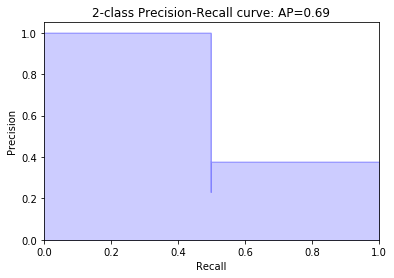

In [103]:
plot_precision_recall_curve(data['y_score'], data['y_true'])
# print("on 50% of recall (3/6) precision was 1.0, then next 50% (next 3/6) we recalled 4 Falses, so we got precision 0.4 (6 TRUE out of 10 total)")

1.0

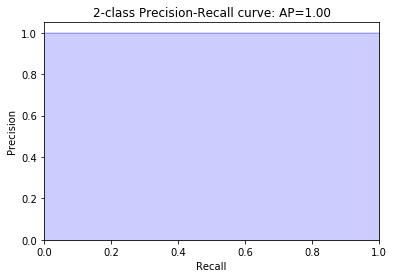

In [104]:
plot_precision_recall_curve(data_TP['y_score'], data_TP['y_true'])

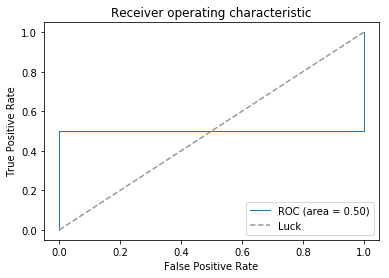

0.5

In [109]:
plot_auc_curve(data['y_score'], data['y_true'])

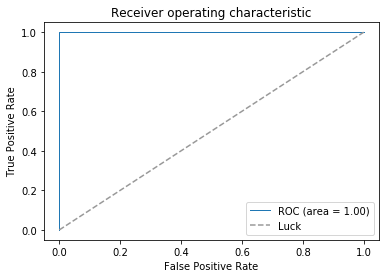

1.0

In [110]:
plot_auc_curve(data_TP['y_score'], data_TP['y_true'])

In [113]:
num_true1=3
num_true2=3
num_false1=5
num_false2=5
y_score = np.array([0.7]*num_true1+[0.6]*num_true2+[0.8]*num_false1+[0.5]*num_false2)
y_true = np.array([True]*num_true1+[True]*num_true2+[False]*num_false1+[False]*num_false2)
data=pd.DataFrame({'y_true': y_true, 'y_score': y_score}).sort_values(by=['y_score'], ascending=False)
data_TP = data[:num_true1+num_true2]
print('+++++++ DQ ++++++') 
print(data)
print('+++++++ TP ++++++') 
print(data_TP)

+++++++ DQ ++++++
    y_true  y_score
6    False      0.8
7    False      0.8
8    False      0.8
9    False      0.8
10   False      0.8
0     True      0.7
1     True      0.7
2     True      0.7
3     True      0.6
4     True      0.6
5     True      0.6
11   False      0.5
12   False      0.5
13   False      0.5
14   False      0.5
15   False      0.5
+++++++ TP ++++++
    y_true  y_score
6    False      0.8
7    False      0.8
8    False      0.8
9    False      0.8
10   False      0.8
0     True      0.7


0.4602272727272727

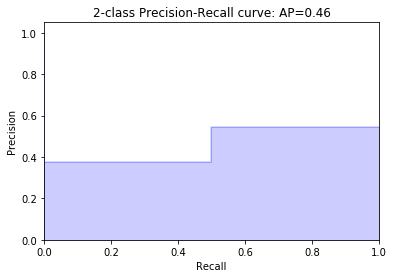

In [114]:
plot_precision_recall_curve(data['y_score'], data['y_true'])

0.16666666666666666

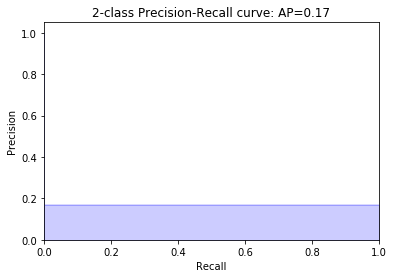

In [115]:
plot_precision_recall_curve(data_TP['y_score'], data_TP['y_true'])

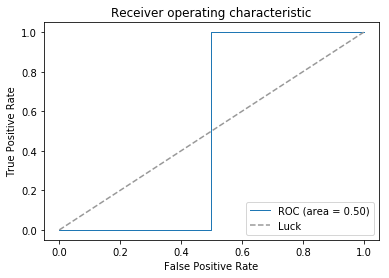

0.5

In [116]:
plot_auc_curve(data['y_score'], data['y_true'])

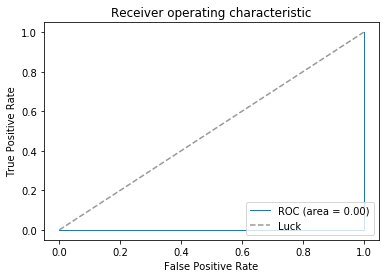

0.0

In [117]:
plot_auc_curve(data_TP['y_score'], data_TP['y_true'])

In [5]:
num_true1=3
num_true2=3
num_false=4
y_score = np.array([0.5]*num_true1+[0.6]*num_true2+[0.7]*num_false)
y_true = np.array([True]*num_true1+[True]*num_true2+[False]*num_false)

   y_true  y_score
6   False      0.7
7   False      0.7
8   False      0.7
9   False      0.7
3    True      0.6
4    True      0.6
5    True      0.6
0    True      0.5
1    True      0.5
2    True      0.5
on 50% of recall (3/6) precision was ~0.4 (3 TRUE/7 TOTAL), next 50% increase in recall (to get to 6/6) we recalled 4 Falses, so we got precision 0.6 (6 TRUE/10 TOTAL)


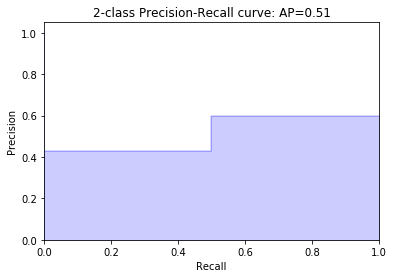

In [6]:
print(pd.DataFrame({'y_true': y_true, 'y_score': y_score}).sort_values(by=['y_score'], ascending=False))
plot_precision_recall_curve(y_score, y_true)
print("on 50% of recall (3/6) precision was ~0.4 (3 TRUE/7 TOTAL), \
next 50% increase in recall (to get to 6/6) we recalled 4 Falses, so we got precision 0.6 (6 TRUE/10 TOTAL)")

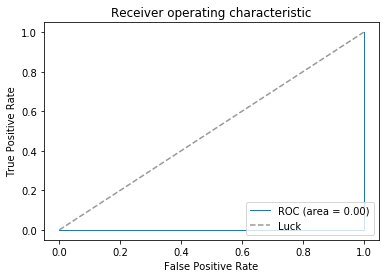

0.0

In [7]:
plot_auc_curve(y_score, y_true)

In [8]:
num_true1=5
num_true2=1
num_false=4
y_score = np.array([0.8]*num_true1+[0.6]*num_true2+[0.7]*num_false)
y_true = np.array([True]*num_true1+[True]*num_true2+[False]*num_false)

   y_true  y_score
0    True      0.8
1    True      0.8
2    True      0.8
3    True      0.8
4    True      0.8
6   False      0.7
7   False      0.7
8   False      0.7
9   False      0.7
5    True      0.6
on ~0.8 of recall (5/6) precision was 1.0, then next ~0.2 (next 1/6) we recalled 4 Falses, so we got precision 0.6 (6 TRUE/10 TOTAL)


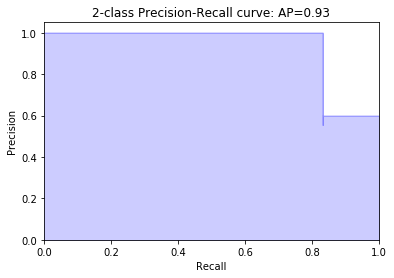

In [9]:
print(pd.DataFrame({'y_true': y_true, 'y_score': y_score}).sort_values(by=['y_score'], ascending=False))
plot_precision_recall_curve(y_score, y_true)
print("on ~0.8 of recall (5/6) precision was 1.0, then next ~0.2 (next 1/6) we recalled 4 Falses, so we got precision 0.6 (6 TRUE/10 TOTAL)")

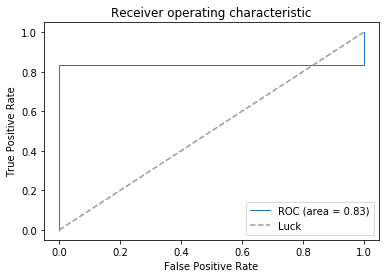

0.8333333333333334

In [10]:
plot_auc_curve(y_score, y_true)